In [1]:
import pandas as pd 
import numpy as np

In [2]:
data=pd.read_excel("C:\\Users\\HP\\OneDrive\\Desktop\\datascience\\Random Forest\\Random Forest\\glass.xlsx",sheet_name='glass')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# 1. Exploratory Data Analysis (EDA):


In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


checking no of rows and columns

In [4]:
data.shape


(214, 10)

checking for datatype and non null count

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


checking the sum of all null count values

In [6]:
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# 2: Data Visualization:


In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt

histogram finding relation each feature 

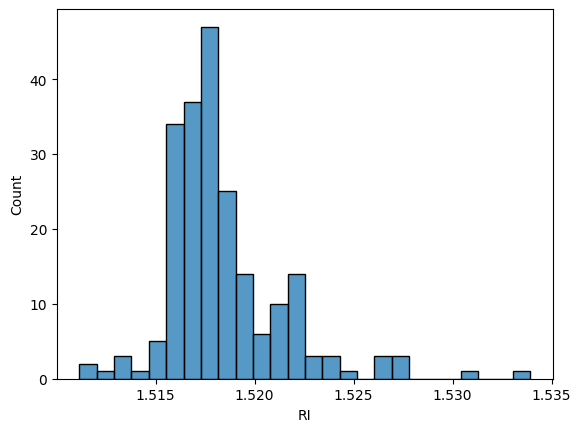

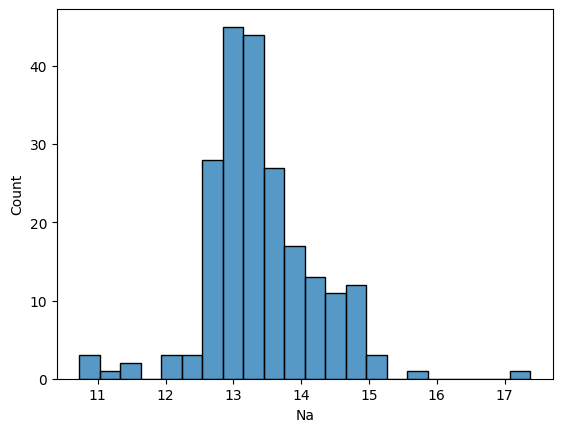

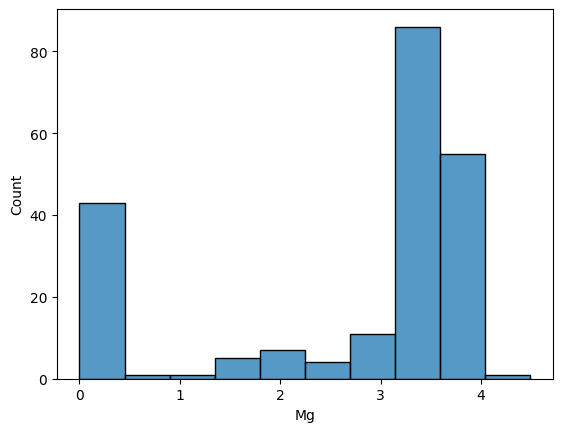

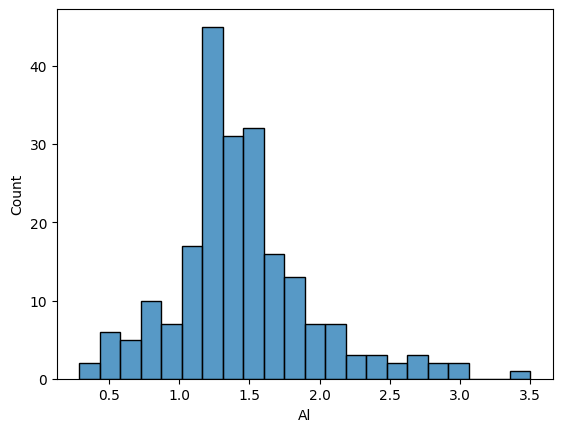

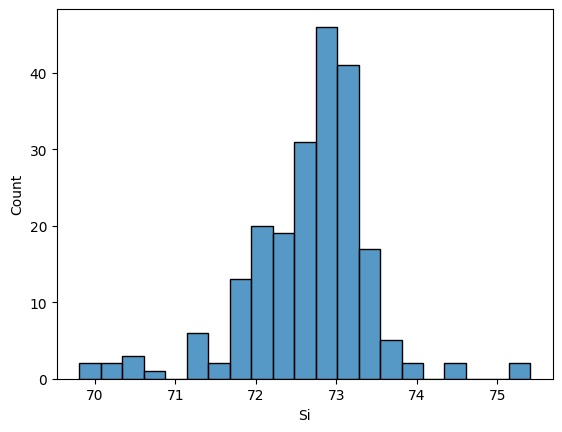

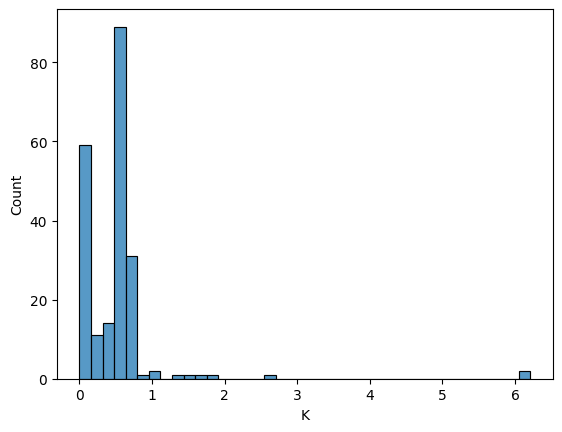

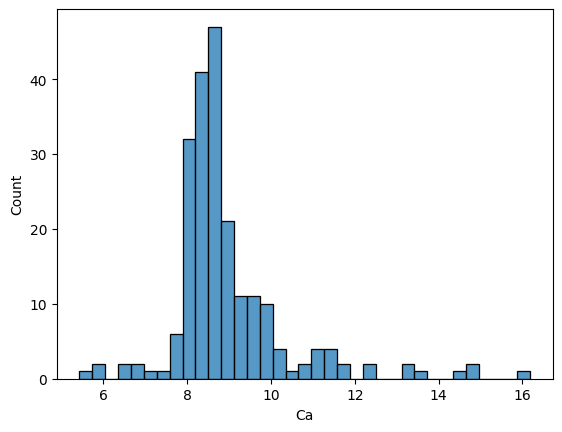

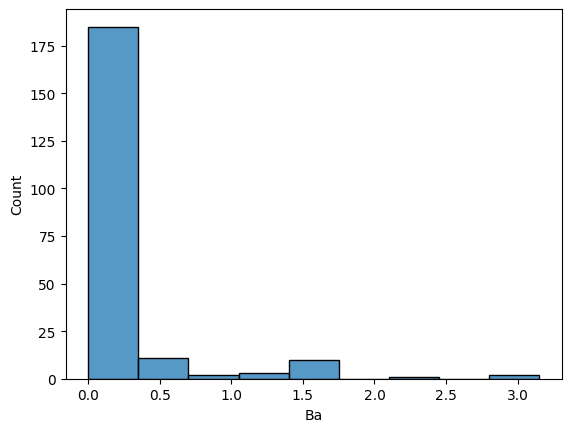

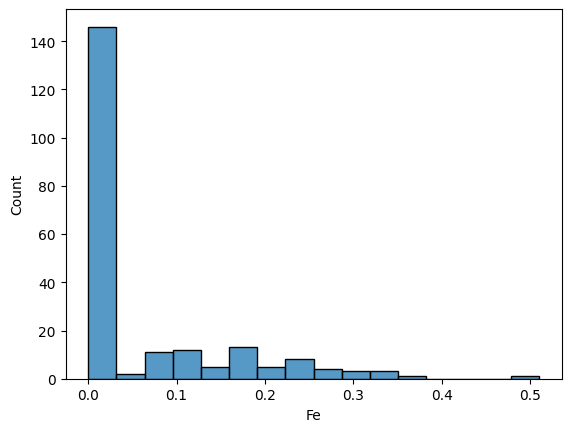

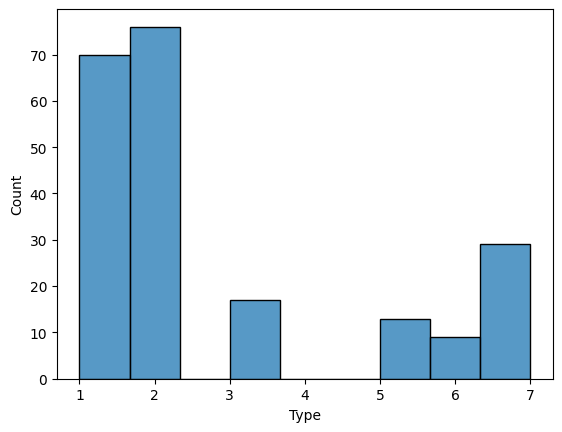

In [9]:
for i in data:
    sns.histplot(data=data,x=i)
    plt.show()

boxplot for finding outliers

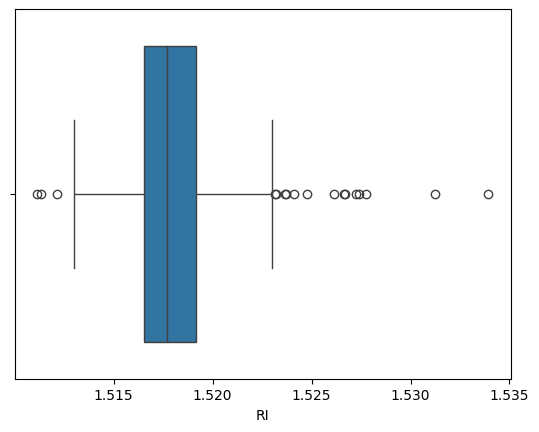

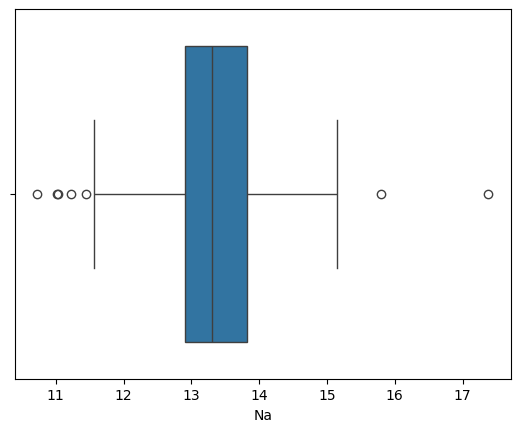

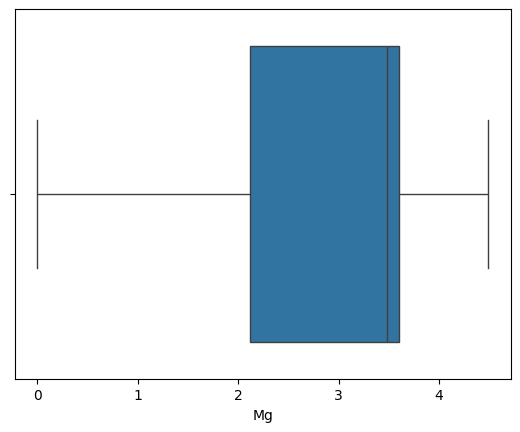

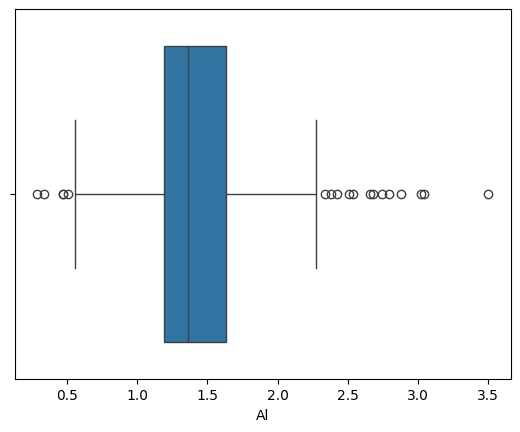

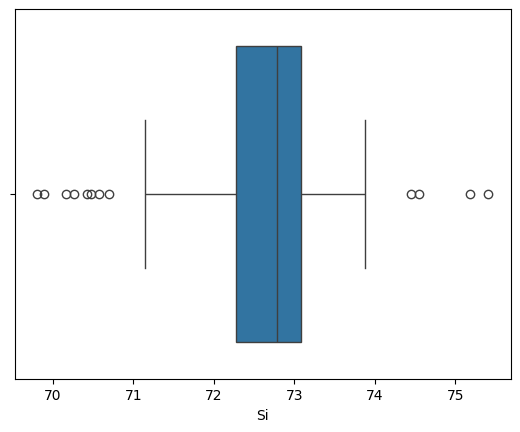

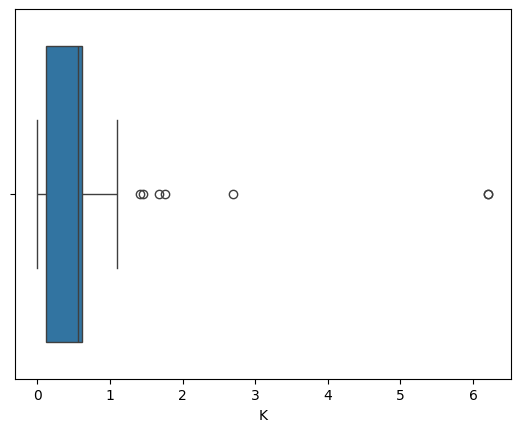

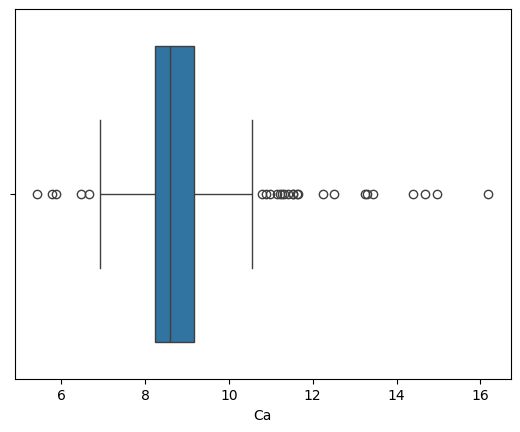

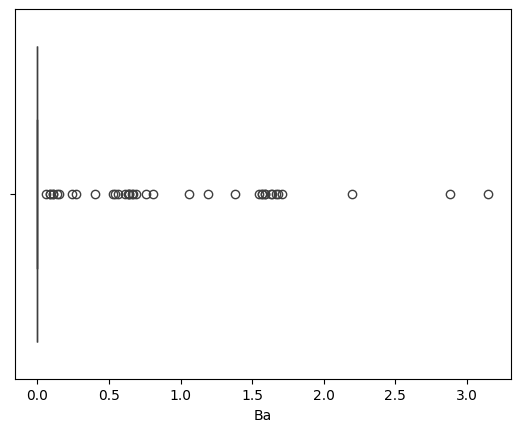

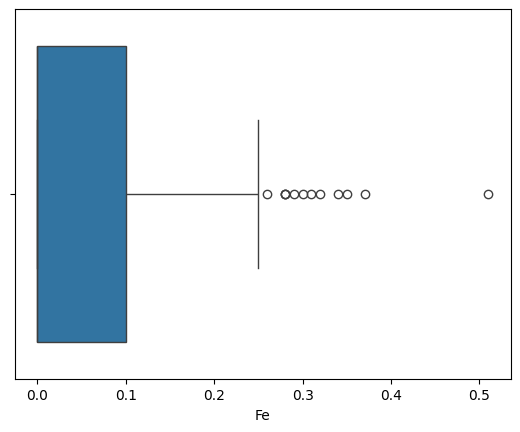

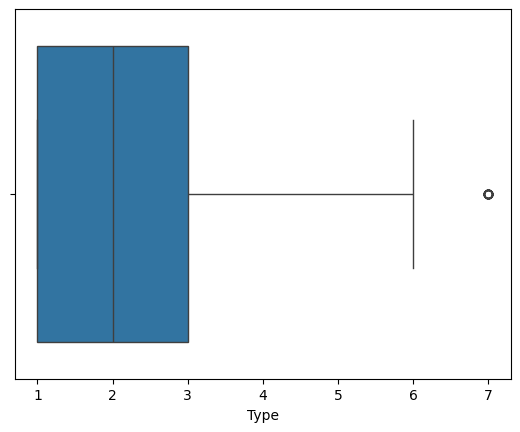

In [10]:
for i in data:
    sns.boxplot(data=data,x=i)
    plt.show()

finding correlation between each feature

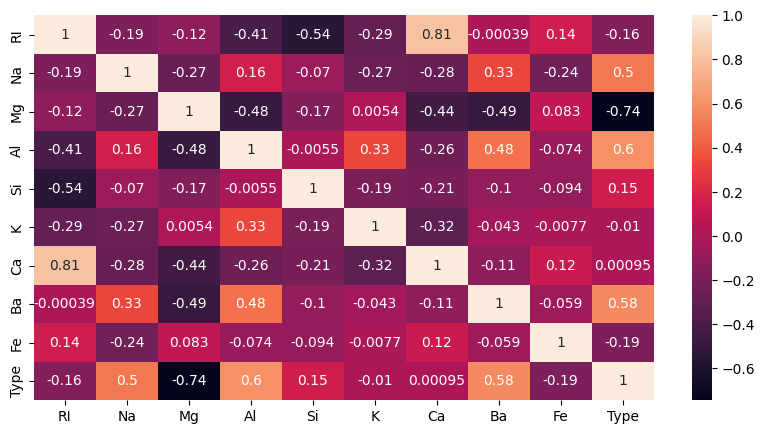

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

# 3: Data Preprocessing


1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.

so in this data we have no null values we can skip this

2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.

we have no categorical columns 

3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.


In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit_transform(data)
df=pd.DataFrame(scaler,columns=data.columns)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,-0.848275
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,-0.848275
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,-0.848275
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,-0.848275
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,-0.848275
...,...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451,2.010478
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451,2.010478
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451,2.010478
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451,2.010478


# 4: Random Forest Model Implementation


1. Divide the data into train and test split.


separeting independent variables

In [13]:
x=df.iloc[:,0:9]
x


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


traget varaiable 

In [14]:
data['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [15]:
y=df.iloc[:,9]
y

0     -0.848275
1     -0.848275
2     -0.848275
3     -0.848275
4     -0.848275
         ...   
209    2.010478
210    2.010478
211    2.010478
212    2.010478
213    2.010478
Name: Type, Length: 214, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("x_train:",x_train)
print('--'*30)
print("x_test:",x_test)
print('--'*30)
print("y_train:",y_train)
print('--'*30)
print("y_test:",y_test)

x_train:            RI        Na        Mg        Al        Si         K        Ca  \
79  -0.813735 -0.721560  0.580575  0.913656  0.270553  0.296533 -0.695130   
161  0.321669  0.284953  0.594473 -1.395110 -0.001209 -0.518017 -0.047163   
109 -0.061200  0.383150 -1.865511 -1.776558  2.328182 -0.763919  1.431893   
127  0.806856  0.456797 -0.281114 -0.029927 -0.855320 -0.010844  0.628977   
95   0.077425 -0.058734  0.518033 -0.029927 -0.505911  0.019893 -0.251413   
..        ...       ...       ...       ...       ...       ...       ...   
106  4.252673 -3.286943 -1.865511  1.315180 -3.676472  0.127475  3.058855   
14  -0.242732 -0.979326  0.629219 -0.270841  0.827019  0.127475 -0.321844   
92  -0.820336 -0.353324  0.504135  0.271217  0.788195 -0.656337 -0.399319   
179  0.051020  0.837308 -0.343656  0.431826  0.024673 -0.763919  0.255692   
102 -0.054599 -0.967052  0.052443 -1.234500  1.499954 -0.226008  0.326123   

           Ba        Fe  
79  -0.352877 -0.586451  
161 -0.050492 

#  Implementing a Random Forest regressor using Python and a machine learning library like scikit-learn.
we use regressor because the target variable is continous

In [17]:
from sklearn.ensemble import RandomForestRegressor
random_model=RandomForestRegressor(n_estimators=3, random_state=42).fit(x_train,y_train)  #Use 3 trees for simplicity
random_model

RandomForestRegressor(n_estimators=3, random_state=42)

In [18]:
pred=random_model.predict(x_test)
pred

array([-0.84827468,  2.01047778, -0.84827468,  2.01047778, -0.37181593,
       -0.37181593, -0.84827468, -0.84827468, -0.37181593, -0.05417677,
        2.01047778,  0.58110155, -0.6894551 , -0.37181593,  1.69283861,
        0.58110155,  1.53401903, -0.37181593, -0.53063551,  1.69283861,
        0.42228197,  1.69283861,  2.01047778,  2.01047778, -0.05417677,
        0.26346239, -0.84827468, -0.84827468,  0.10464281, -0.37181593,
        0.10464281, -0.53063551, -0.6894551 , -0.6894551 , -0.84827468,
        2.01047778,  1.05756029, -0.53063551, -0.6894551 ,  0.26346239,
        1.05756029,  2.01047778, -0.37181593])

# as we are using regressor so metrics for continuos are like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R² score, or Mean Absolute Error (MAE) are typically used.


In [19]:
from sklearn.metrics import mean_squared_error,r2_score
score=mean_squared_error(y_test,pred)
score

0.20589545080251714

Mean Squared Error (MSE) of 0.206 indicates that, on average, the squared difference between predicted values and actual values is about 0.206. In general, a lower MSE indicates a better fit of the model to the data. 

In [20]:
rsquared=r2_score(y_test,pred)
rsquared

0.8267203967761935

An R² score of 0.826 means that about 82.6% of the variation in your target variable is explained by  model. This suggests that model is doing a good job of predicting the target variable.

# 5: Bagging and Boosting Methods

Apply the Bagging and Boosting methods and compare the results.


bagging

In [21]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor 
bagging_model=BaggingRegressor(base_estimator=random_model, n_estimators=50, random_state=42).fit(x_train,y_train)
bagging_model

BaggingRegressor(base_estimator=RandomForestRegressor(n_estimators=3,
                                                      random_state=42),
                 n_estimators=50, random_state=42)

boosting

In [22]:
boosting_model=AdaBoostRegressor(base_estimator=random_model, n_estimators=50, random_state=42).fit(x_train,y_train)
boosting_model

AdaBoostRegressor(base_estimator=RandomForestRegressor(n_estimators=3,
                                                       random_state=42),
                  random_state=42)

predicting values on using test data 

bagging

In [23]:
bag_pred=bagging_model.predict(x_test)
bag_pred

array([-0.77839406,  2.00412499, -0.71168984,  1.91518603, -0.01923647,
        0.13323033, -0.8006288 , -0.54651747, -0.44169655, -0.20664357,
        1.38155224,  0.38416527, -0.60686891, -0.39722707,  1.32755358,
        0.72403917,  1.69283861, -0.62592726, -0.63545644,  1.25449657,
        0.28252074,  1.82942345,  1.87389294,  1.86118737, -0.29558254,
       -0.09546986, -0.78474684, -0.77204128,  0.23487486, -0.75933571,
       -0.21299635, -0.47663686, -0.34005202, -0.13358656, -0.51792995,
        2.01047778,  1.07344225, -0.55604665, -0.27334779,  0.90826989,
        0.28887352,  1.99459582, -0.63863283])

boosting

In [24]:
boost_pred=boosting_model.predict(x_test)
boost_pred

array([-0.6894551 ,  2.01047778, -0.6894551 ,  1.8516582 , -0.21299635,
       -0.37181593, -0.6894551 , -0.53063551, -0.53063551, -0.37181593,
        1.37519945,  0.10464281, -0.53063551, -0.37181593,  1.53401903,
        1.05756029,  1.69283861, -0.6894551 , -0.53063551,  1.53401903,
        0.10464281,  2.01047778,  1.8516582 ,  2.01047778, -0.21299635,
        0.10464281, -0.53063551, -0.6894551 ,  0.26346239, -0.6894551 ,
       -0.37181593, -0.53063551, -0.37181593, -0.21299635, -0.53063551,
        2.01047778,  1.05756029, -0.53063551, -0.37181593,  1.21637987,
       -0.05417677,  1.8516582 , -0.53063551])

evaluvate performance on actual test data  values and predicted values

bagging

In [25]:
from sklearn.metrics import mean_squared_error,r2_score
mean_score= mean_squared_error(y_test,bag_pred)
mean_score

0.1445165504264719

In [26]:
r2score=r2_score(y_test,bag_pred)
r2score

0.8783762806824184

boosting

In [27]:
from sklearn.metrics import mean_squared_error,r2_score
mean_score= mean_squared_error(y_test,boost_pred)
mean_score

0.15075535856480604

In [28]:
r2score=r2_score(y_test,boost_pred)
r2score

0.873125760602512

so after using the bagging and boosting the results are more good  in predticing values  

Additional Notes:

# 1. Explain Bagging and Boosting methods. How is it different from each other.
   
# Bagging:

Bagging is an ensemble technique that combines predictions from multiple models trained independently.

Learning Strategy:Parallel (independent models)

Goal :	Reduces variance

Focus :	Reduces overfitting

Model Emphasis :	Each model has equal weight

Examples  :	Random Forest

# Boosting:

Boosting is a sequential ensemble technique that builds models iteratively, each focusing on errors from the previous ones

Learning Strategy:Sequential (each model corrects previous errors)

Goal :Reduces bias and variance

Focus :	Improves model accuracy

Model Emphasis :Models focus more on errors (misclassified instances)

Examples  :AdaBoost, Gradient Boosting

# 2 Explain how to handle imbalance in the data.

Imbalanced data means one category (like "Not Survived") has way more examples than the other category (like "Survived"). To fix this, you can:

Add more of the rare category: Make the small group bigger by copying examples or creating new ones.This is called oversampling

Take away some of the big category: Remove some examples from the larger group to make things more equal.This is calles undersampling

Make the model focus more on the rare category: Tell the model to pay more attention to the smaller group when learning.

Use better ways to measure success: Instead of just looking at accuracy, check how well the model is predicting the smaller group.

Create fake data: Make up new examples for the rare category if you don't have enough.